In [1]:
#Exercise: As sample size increases, the power of a hypothesis test increases, 
#which means it is more likely to be positive if the effect is real. Conversely, as 
#sample size decreases, the test is less likely to be positive even if the effect is real.
#To investigate this behavior, run the tests in this chapter with different subsets 
#of the NSFG data. You can use thinkstats2.SampleRows to select a random subset of 
#the rows in a DataFrame.
#
#What happens to the p-values of these tests as sample size decreases?

In [2]:
from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2

from collections import defaultdict
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import random

import thinkstats2
import thinkplot



In [3]:
# Loading modules
import first

live, firsts, others = first.MakeFrames()
data = firsts.prglngth.values, others.prglngth.values

In [10]:
# Defining class and functions
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [12]:
# creating dataframe for random records with 1000 iterations

def RandomTestDataset(live, iters=1000):
    n = len(live)
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

In [16]:
# comparing length of pregnancies
  
data = firsts.prglngth.values, others.prglngth.values
ht = DiffMeansPermute(data) ####using function
p1 = ht.PValue(iters=1000)
data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
ht = DiffMeansPermute(data)
p2 = ht.PValue(iters=1000)

In [19]:
# define class 

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [22]:
 # test correlation
live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
data = live2.agepreg.values, live2.totalwgt_lb.values
ht = CorrelationPermute(data)
p3 = ht.PValue(iters=1000)

In [23]:
# Defining class

class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [26]:
  # compare pregnancy lengths (chi-squared)
data = firsts.prglngth.values, others.prglngth.values
ht = PregLengthTest(data)
p4 = ht.PValue(iters=1000)

In [30]:
print('%d\t%0.2f\t%0.2f\t%0.2f\t%0.2f' % (n, p1, p2, p3, p4))

71	0.16	0.00	0.00	0.00


In [42]:
n = len(live)
for _ in range(7):
    sample = thinkstats2.SampleRows(live, n)
    RandomTestDataset(sample)
    n //= 2

In [41]:
9148	0.16	0.00	0.00	0.00
4574	0.24	0.00	0.00	0.00
2287	0.80	0.15	0.00	0.00
1143	0.64	0.03	0.00	0.00
571	0.36	0.78	0.88	0.03
285	0.71	0.03	0.53	0.05
142	0.12	0.62	0.54	0.07

0	0.16	0.00	0.00	0.00


In [43]:
#What happens to the p-values of these tests as sample size decreases? 
#What is the smallest sample size that yields a positive test?

In [44]:
# data samples with large sizes have a positive p value and become negative with reduction in data set size

In [45]:
#Exercise: In testing a difference in means, on page 104, we simulated the null hypothesis by permutation; 
#that is, we treated the observed values as if they represented the entire population, and randomly 
#that is, we treated the observed values as if they represented the entire population, and randomly 
#assigned the members of the population to the two groups.

#An alternative is to use the sample to estimate the distribution for the population, 
#then draw a random sample from that distribution. This process is called resampling. 
#There are several ways to implement resampling, but one of the simplest is to draw a 
#sample with replacement from the observed values, as in Section 9.10.

#Write a class named DiffMeansResample that inherits from DiffMeansPermute 
#and overrides RunModel to implement resampling, rather than permutation.

#Use this model to test the differences in pregnancy length and birth weight.
#How much does the model affect the results?

In [48]:
# defining class to test difference in means
class DiffMeansResample(DiffMeansPermute):
    """Tests a difference in means using resampling."""
    
    def RunModel(self):
     
        group1 = np.random.choice(self.pool, self.n, replace=True)
        group2 = np.random.choice(self.pool, self.m, replace=True)
        return group1, group2

In [50]:
# resampling test

def RunResampleTest(firsts, others):
   
    data = firsts.prglngth.values, others.prglngth.values
    ht = DiffMeansResample(data)
    p_value = ht.PValue(iters=10000)
    print('\ndiff means resample preglength')
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())

    data = (firsts.totalwgt_lb.dropna().values,
            others.totalwgt_lb.dropna().values)
    ht = DiffMeansPermute(data)
    p_value = ht.PValue(iters=10000)
    print('\ndiff means resample birthweight')
    print('p-value =', p_value)
    print('actual =', ht.actual)
    print('ts max =', ht.MaxTestStat())

In [51]:
RunResampleTest(firsts, others)


diff means resample preglength
p-value = 0.1588
actual = 0.07803726677754952
ts max = 0.2288487192611015

diff means resample birthweight
p-value = 0.0
actual = 0.12476118453549034
ts max = 0.11858590284612625


In [52]:
#Resampling Vs.Permutation does not drastically impact results
# With the generated information, we cannot choose one model over the other with certainty

In [53]:
#Exercise: Using the data from the BRFSS, compute the linear least squares fit for log(weight) 
#versus height. How would you best present the estimated parameters for a model like this where 
#one of the variables is log-transformed? If you were trying to guess someone’s weight, how much 
#would it help to know their height?

#Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. 
#In the BRFSS data, the variable name for these weights is totalwt. Use resampling, with and without 
#weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, 
#and a 90% confidence interval. How much does correct weighting affect the estimates?

#Read the BRFSS data and extract heights and log weights.

In [54]:
# reading BRFSS data
import brfss

df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2
log_weights = np.log10(weights)

In [55]:
# Definig intercept and slope


inter, slope = thinkstats2.LeastSquares(heights, log_weights)
inter, slope

(0.9930804163918064, 0.005281454169417842)

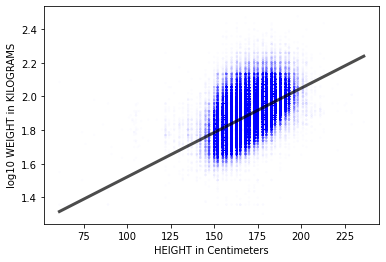

In [64]:
# scatterplot

thinkplot.Scatter(heights, log_weights, alpha=0.01, s=7)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, fys, color='black')
thinkplot.Config(xlabel='HEIGHT in Centimeters', ylabel='log10 WEIGHT in KILOGRAMS', legend=False)

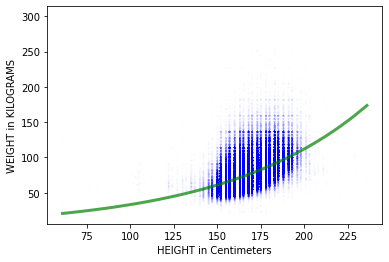

In [65]:
# Scatterplot using Linear scale

thinkplot.Scatter(heights, weights, alpha=0.01, s=5)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, 10**fys, color='green')
thinkplot.Config(xlabel='HEIGHT in Centimeters', ylabel='WEIGHT in KILOGRAMS', legend=False)

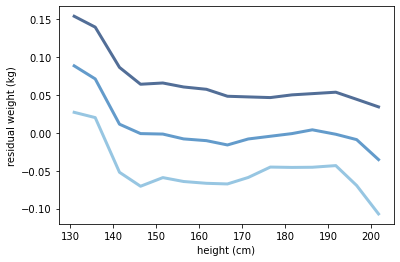

In [66]:
# percentiles of the residuals

res = thinkstats2.Residuals(heights, log_weights, inter, slope)
df['residual'] = res

bins = np.arange(130, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

means = [group.htm3.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    ys = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(means, ys, label=label)
    
thinkplot.Config(xlabel='height (cm)', ylabel='residual weight (kg)', legend=False)

In [67]:
#lines are flat for a greater part of the range, 
#which indicates a linear relationship between height and weight.

# The lines are to some extent parallel to each other, which means  
# that the residuals variance is thesame across the range.

In [68]:
# correlation

rho = thinkstats2.Corr(heights, log_weights)
rho

0.5317282605983464

In [69]:
# coefficient of determination

r2 = thinkstats2.CoefDetermination(log_weights, res)
r2

0.2827349431189352

In [70]:
# Test if  𝑅2=𝜌2 

rho**2 - r2

7.827072323607354e-15

In [71]:
#Compute Std(ys), which is the RMSE of predictions that don't use height.

std_ys = thinkstats2.Std(log_weights)
std_ys

0.10320725030004853

In [72]:
# Compute Std(res), the RMSE of predictions that do use height.

std_res = thinkstats2.Std(res)
std_res

0.08740777080416083

In [73]:
# How much does height information reduce RMSE?

1 - std_res / std_ys

0.1530849765879313

In [74]:
#  resampling to compute sampling distributions for inter and slope.

t = []
for _ in range(100):
    sample = thinkstats2.ResampleRows(df)
    estimates = thinkstats2.LeastSquares(sample.htm3, np.log10(sample.wtkg2))
    t.append(estimates)

inters, slopes = zip(*t)

{'xscale': 'linear', 'yscale': 'linear'}

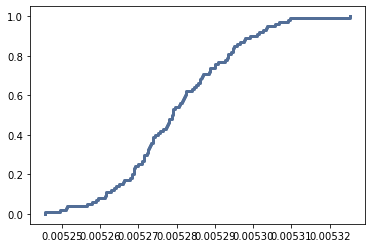

In [75]:
# sampling distribution of slope.

cdf = thinkstats2.Cdf(slopes)
thinkplot.Cdf(cdf)

In [76]:
# Compute the p-value of the slope.

pvalue = cdf[0]
pvalue

0

In [77]:
# Compute the 90% confidence interval of slope.

ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(0.005256578657653669, 0.005303482922607557)

In [78]:
#Compute the mean of the sampling distribution.

mean = thinkstats2.Mean(slopes)
mean

0.005280000511244196

In [79]:
#Compute the standard deviation of the sampling distribution, which is the standard error

stderr = thinkstats2.Std(slopes)
stderr

1.4720053325893681e-05

In [81]:
# Defining function

def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [83]:
# Importing Mean module

from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [84]:
# Resample rows without weights, compute mean height, and summarize results.

estimates_unweighted = [thinkstats2.ResampleRows(df).htm3.mean() for _ in range(100)]
Summarize(estimates_unweighted)

mean, SE, CI 168.95452775419878 0.0204496137776296 (168.92170415731925, 168.98547363527962)


In [89]:
#Defining function

def ResampleRowsWeighted(df, column='finalwgt'):
    weights = df[column]
    cdf = thinkstats2.Cdf(dict(weights))
    indices = cdf.Sample(len(weights))
    sample = df.loc[indices]
    return sample

In [ ]:
estimates_weighted = [ResampleRowsWeighted(df, 'finalwt').htm3.mean() for _ in range(100)]
Summarize(estimates_weighted)

In [ ]:
# estimated men height is approx. 1.54 cms greater 